# Q1: Unsupervised Learning

In [5]:
! pip install --upgrade numpy 

     |████████████████████████████████| 18.1 MB 189 kB/s eta 0:00:01
  Attempting uninstall: numpy
    Found existing installation: numpy 1.19.2
    Uninstalling numpy-1.19.2:
      Successfully uninstalled numpy-1.19.2
ERROR: After October 2020 you may experience errors when installing or updating packages. This is because pip will change the way that it resolves dependency conflicts.

We recommend you use --use-feature=2020-resolver to test your packages with the new resolver before it becomes the default.

yellowbrick 1.3.post1 requires numpy<1.20,>=1.16.0, but you'll have numpy 1.23.4 which is incompatible.
tensorflow 2.5.0 requires numpy~=1.19.2, but you'll have numpy 1.23.4 which is incompatible.
statsmodels 0.13.5 requires packaging>=21.3, but you'll have packaging 20.4 which is incompatible.
statsmodels 0.13.5 requires patsy>=0.5.2, but you'll have patsy 0.5.1 which is incompatible.
scikit-learn 1.1.2 requires joblib>=1.0.0, but you'll have joblib 0.17.0 which is incompatible.


In [2]:
import pandas as pd
import numpy as np
import random as rd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split


/opt/anaconda3/lib/python3.8/site-packages/pandas/core/computation/expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [3]:
#Load Data
df = pd.read_csv('transactions_n100000.csv')

print(df.head())
print(df.describe())
print(df.dtypes)


print(df.isnull().sum())

#scanning the dataset


  ticket_id      order_timestamp  location item_name  item_count        lat  \
0  0x872a40  2019-02-28 18:33:00         4     shake           2  41.889047   
1  0x872a40  2019-02-28 18:33:00         4    burger           2  41.889047   
2  0x872a40  2019-02-28 18:33:00         4     fries           2  41.889047   
3  0x598eb3  2019-09-18 11:59:00         5    burger           1  41.881818   
4  0x598eb3  2019-09-18 11:59:00         5     salad           2  41.881818   

        long  
0 -87.803605  
1 -87.803605  
2 -87.803605  
3 -87.640234  
4 -87.640234  
            location     item_count            lat           long
count  260741.000000  260741.000000  260741.000000  260741.000000
mean        5.128123       2.446424      41.836145     -87.733627
std         2.557513       1.330490       0.144791       0.135937
min         1.000000       1.000000      41.524598     -88.010140
25%         3.000000       1.000000      41.784576     -87.849468
50%         5.000000       2.000000    

In [4]:
df['month'] = pd.DatetimeIndex(df['order_timestamp']).month
df['hour'] = pd.DatetimeIndex(df['order_timestamp']).hour

In [4]:
df

,ticket_id,order_timestamp,location,item_name,item_count,lat,long,month,hour
0,0x872a40,2019-02-28 18:33:00,4,shake,2,41.889047,-87.803605,2,18
1,0x872a40,2019-02-28 18:33:00,4,burger,2,41.889047,-87.803605,2,18
2,0x872a40,2019-02-28 18:33:00,4,fries,2,41.889047,-87.803605,2,18
3,0x598eb3,2019-09-18 11:59:00,5,burger,1,41.881818,-87.640234,9,11
4,0x598eb3,2019-09-18 11:59:00,5,salad,2,41.881818,-87.640234,9,11
...,...,...,...,...,...,...,...,...,...
260736,0x3c0582,2019-05-27 17:06:00,9,burger,3,41.524598,-87.849468,5,17
260737,0x3c0582,2019-05-27 17:06:00,9,salad,1,41.524598,-87.849468,5,17
260738,0x3c0582,2019-05-27 17:06:00,9,fries,4,41.524598,-87.849468,5,17
260739,0x104597,2019-12-10 00:25:00,2,burger,3,42.049306,-87.677606,12,0


In [5]:
#encode the location in terms of latitude 
#since latitude and longtitude have a relation of one-to-one correspondence, here we only use latitude to mark the location
location_values = {41.889047:"1124 Lake St STE 510, Oak Park, IL 60301",
                  41.524598:'20091 South La Grange Road, Frankfort, IL 60423',
                  41.784576:'6014 S Cottage Grove Ave, Chicago, IL 60637',
                  41.794132:'5127 Main St, Downers Grove, IL 60515',
                  41.880844:'S Clark St, Chicago, IL 60603',
                  41.881818:'462-514 W Madison St, Chicago, IL 60661',
                  41.88449:'20b E Randolph St, Chicago, IL 60601',
                  41.894202:'259 E Erie St, Chicago, IL 60611',
                  42.049306:'598-560 Clark St, Evanston, IL 60201'}
df.lat = df.lat.map(location_values)
print(df.head())
print(df.dtypes)
print(df.lat)

  ticket_id      order_timestamp  location item_name  item_count  \
0  0x872a40  2019-02-28 18:33:00         4     shake           2   
1  0x872a40  2019-02-28 18:33:00         4    burger           2   
2  0x872a40  2019-02-28 18:33:00         4     fries           2   
3  0x598eb3  2019-09-18 11:59:00         5    burger           1   
4  0x598eb3  2019-09-18 11:59:00         5     salad           2   

                                        lat       long  month  hour  
0  1124 Lake St STE 510, Oak Park, IL 60301 -87.803605      2    18  
1  1124 Lake St STE 510, Oak Park, IL 60301 -87.803605      2    18  
2  1124 Lake St STE 510, Oak Park, IL 60301 -87.803605      2    18  
3   462-514 W Madison St, Chicago, IL 60661 -87.640234      9    11  
4   462-514 W Madison St, Chicago, IL 60661 -87.640234      9    11  
ticket_id           object
order_timestamp     object
location             int64
item_name           object
item_count           int64
lat                 object
long     

In [6]:
df

,ticket_id,order_timestamp,location,item_name,item_count,lat,long,month,hour
0,0x872a40,2019-02-28 18:33:00,4,shake,2,"1124 Lake St STE 510, Oak Park, IL 60301",-87.803605,2,18
1,0x872a40,2019-02-28 18:33:00,4,burger,2,"1124 Lake St STE 510, Oak Park, IL 60301",-87.803605,2,18
2,0x872a40,2019-02-28 18:33:00,4,fries,2,"1124 Lake St STE 510, Oak Park, IL 60301",-87.803605,2,18
3,0x598eb3,2019-09-18 11:59:00,5,burger,1,"462-514 W Madison St, Chicago, IL 60661",-87.640234,9,11
4,0x598eb3,2019-09-18 11:59:00,5,salad,2,"462-514 W Madison St, Chicago, IL 60661",-87.640234,9,11
...,...,...,...,...,...,...,...,...,...
260736,0x3c0582,2019-05-27 17:06:00,9,burger,3,"20091 South La Grange Road, Frankfort, IL 60423",-87.849468,5,17
260737,0x3c0582,2019-05-27 17:06:00,9,salad,1,"20091 South La Grange Road, Frankfort, IL 60423",-87.849468,5,17
260738,0x3c0582,2019-05-27 17:06:00,9,fries,4,"20091 South La Grange Road, Frankfort, IL 60423",-87.849468,5,17
260739,0x104597,2019-12-10 00:25:00,2,burger,3,"598-560 Clark St, Evanston, IL 60201",-87.677606,12,0


In [7]:
X = df.drop(['ticket_id','order_timestamp','long','month','location'],axis=1)
X

,item_name,item_count,lat,hour
0,shake,2,"1124 Lake St STE 510, Oak Park, IL 60301",18
1,burger,2,"1124 Lake St STE 510, Oak Park, IL 60301",18
2,fries,2,"1124 Lake St STE 510, Oak Park, IL 60301",18
3,burger,1,"462-514 W Madison St, Chicago, IL 60661",11
4,salad,2,"462-514 W Madison St, Chicago, IL 60661",11
...,...,...,...,...
260736,burger,3,"20091 South La Grange Road, Frankfort, IL 60423",17
260737,salad,1,"20091 South La Grange Road, Frankfort, IL 60423",17
260738,fries,4,"20091 South La Grange Road, Frankfort, IL 60423",17
260739,burger,3,"598-560 Clark St, Evanston, IL 60201",0


In [ ]:
one_hot = OneHotEncoder(sparse=False)

X = df.drop(['ticket_id','order_timestamp','long','location','month'],axis=1)
print(X)


#X_train,X_test = train_test_split(X,test_size=0.2, random_state=1234)

print(X.describe())

cat_feat = list(X.columns[X.dtypes == object])
num_feat = list(X.columns[X.dtypes != object])

X_cat = X.loc[:,cat_feat] 


X_num = X.loc[:,num_feat]


#X_train_cat = np.array(X_train_cat).reshape(len(X_train_cat),1)
#X_test_cat = np.array(X_test_cat).reshape(len(X_test_cat),1)

X_cat = pd.DataFrame(one_hot.fit_transform(X_cat))


print(X_cat)

X_new = pd.concat([X_cat,X_num],axis=1)


sc_dfa = StandardScaler()
X_new = sc_dfa.fit_transform(X_new.astype(float))

X_new = X_new[np.isfinite(X_new).all(1)]

In [ ]:
Sum_of_squared_distances = []
K = range(1,10)
for num_clusters in K :
 kmeans = KMeans(n_clusters=num_clusters)
 kmeans.fit(X_new)
 Sum_of_squared_distances.append(kmeans.inertia_)
plt.plot(K,Sum_of_squared_distances,'bx-')
plt.xlabel('Values of K') 
plt.ylabel('Sum of squared distances/Inertia')
plt.title('Elbow Method For Optimal k')
plt.show()


## try to keep the categorical attributes to be more interpretable

In [8]:
from kmodes.kprototypes import KPrototypes

In [9]:
sc_dfa = StandardScaler()

In [10]:
X[[ 'item_count','hour']] = sc_dfa.fit_transform(X[['item_count','hour']])

In [11]:
X

,item_name,item_count,lat,hour
0,shake,-0.335534,"1124 Lake St STE 510, Oak Park, IL 60301",0.781972
1,burger,-0.335534,"1124 Lake St STE 510, Oak Park, IL 60301",0.781972
2,fries,-0.335534,"1124 Lake St STE 510, Oak Park, IL 60301",0.781972
3,burger,-1.087138,"462-514 W Madison St, Chicago, IL 60661",-0.148183
4,salad,-0.335534,"462-514 W Madison St, Chicago, IL 60661",-0.148183
...,...,...,...,...
260736,burger,0.416070,"20091 South La Grange Road, Frankfort, IL 60423",0.649093
260737,salad,-1.087138,"20091 South La Grange Road, Frankfort, IL 60423",0.649093
260738,fries,1.167675,"20091 South La Grange Road, Frankfort, IL 60423",0.649093
260739,burger,0.416070,"598-560 Clark St, Evanston, IL 60201",-1.609857


In [12]:
categorical_features_idx = [0,2]

In [13]:
df_array=X.values

In [14]:
kproto = KPrototypes(n_clusters=4, verbose=2, max_iter=10)
kproto.fit(df_array, categorical=categorical_features_idx)

Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/10, moves: 50381, ncost: 325819.3199035203
Run: 1, iteration: 2/10, moves: 29869, ncost: 310113.78786209726
Run: 1, iteration: 3/10, moves: 10848, ncost: 307893.824274858
Run: 1, iteration: 4/10, moves: 18192, ncost: 300154.4219522012
Run: 1, iteration: 5/10, moves: 31743, ncost: 286118.13550002524
Run: 1, iteration: 6/10, moves: 17983, ncost: 278244.61872413737
Run: 1, iteration: 7/10, moves: 7468, ncost: 277131.03998972103
Run: 1, iteration: 8/10, moves: 234, ncost: 277129.5908438165
Run: 1, iteration: 9/10, moves: 0, ncost: 277129.5908438165
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 2, iteration: 1/10, moves: 7901, ncost: 273937.3710853173
Run: 2, iteration: 2/10, moves: 520, ncost: 273931.28404584137
Run: 2, iteration: 3/10, moves: 0, ncost: 273931.28404584137
Init:

KPrototypes(gamma=0.5, max_iter=10, n_clusters=4, verbose=2)

In [15]:
clusters = kproto.predict(X, categorical=categorical_features_idx)

In [16]:
X['cluster'] = list(clusters)
X[[ 'item_count','hour']] = sc_dfa.inverse_transform(X[['item_count','hour']])
X

,item_name,item_count,lat,hour,cluster
0,shake,2.0,"1124 Lake St STE 510, Oak Park, IL 60301",18.0,3
1,burger,2.0,"1124 Lake St STE 510, Oak Park, IL 60301",18.0,3
2,fries,2.0,"1124 Lake St STE 510, Oak Park, IL 60301",18.0,3
3,burger,1.0,"462-514 W Madison St, Chicago, IL 60661",11.0,1
4,salad,2.0,"462-514 W Madison St, Chicago, IL 60661",11.0,1
...,...,...,...,...,...
260736,burger,3.0,"20091 South La Grange Road, Frankfort, IL 60423",17.0,3
260737,salad,1.0,"20091 South La Grange Road, Frankfort, IL 60423",17.0,1
260738,fries,4.0,"20091 South La Grange Road, Frankfort, IL 60423",17.0,2
260739,burger,3.0,"598-560 Clark St, Evanston, IL 60201",0.0,0


<AxesSubplot: >

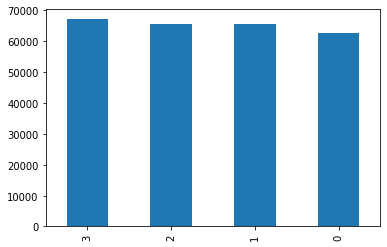

In [35]:
X['cluster'].value_counts().plot(kind='bar')

In [18]:
C1=X[X['cluster']==0]
C2=X[X['cluster']==1]
C3=X[X['cluster']==2]
C4=X[X['cluster']==3]


In [19]:
C1.to_csv("/Users/Cimon/Desktop/marketing analytics/C1_hour.csv")

In [20]:
C2.to_csv("/Users/Cimon/Desktop/marketing analytics/C2_hour.csv")
C3.to_csv("/Users/Cimon/Desktop/marketing analytics/C3_hour.csv")
C4.to_csv("/Users/Cimon/Desktop/marketing analytics/C4_hour.csv")


In [37]:
C1['lat'].value_counts()

598-560 Clark St, Evanston, IL 60201               24986
6014 S Cottage Grove Ave, Chicago, IL 60637        24726
259 E Erie St, Chicago, IL 60611                    2035
S Clark St, Chicago, IL 60603                       2007
20b E Randolph St, Chicago, IL 60601                1991
1124 Lake St STE 510, Oak Park, IL 60301            1918
20091 South La Grange Road, Frankfort, IL 60423     1868
5127 Main St, Downers Grove, IL 60515               1862
462-514 W Madison St, Chicago, IL 60661             1300
Name: lat, dtype: int64

In [38]:
C2['lat'].value_counts()

20b E Randolph St, Chicago, IL 60601               11777
S Clark St, Chicago, IL 60603                       9634
259 E Erie St, Chicago, IL 60611                    9556
462-514 W Madison St, Chicago, IL 60661             9467
5127 Main St, Downers Grove, IL 60515               5065
1124 Lake St STE 510, Oak Park, IL 60301            5021
20091 South La Grange Road, Frankfort, IL 60423     5008
6014 S Cottage Grove Ave, Chicago, IL 60637         4993
598-560 Clark St, Evanston, IL 60201                4891
Name: lat, dtype: int64

In [39]:
C3['lat'].value_counts()

1124 Lake St STE 510, Oak Park, IL 60301           15741
20091 South La Grange Road, Frankfort, IL 60423    15456
5127 Main St, Downers Grove, IL 60515              15304
259 E Erie St, Chicago, IL 60611                    3511
598-560 Clark St, Evanston, IL 60201                3489
6014 S Cottage Grove Ave, Chicago, IL 60637         3430
S Clark St, Chicago, IL 60603                       2944
462-514 W Madison St, Chicago, IL 60661             2885
20b E Randolph St, Chicago, IL 60601                2829
Name: lat, dtype: int64

In [40]:
C4['lat'].value_counts()

20091 South La Grange Road, Frankfort, IL 60423    11751
5127 Main St, Downers Grove, IL 60515              11316
1124 Lake St STE 510, Oak Park, IL 60301           11210
259 E Erie St, Chicago, IL 60611                    6980
462-514 W Madison St, Chicago, IL 60661             6639
S Clark St, Chicago, IL 60603                       6631
20b E Randolph St, Chicago, IL 60601                4660
598-560 Clark St, Evanston, IL 60201                3977
6014 S Cottage Grove Ave, Chicago, IL 60637         3883
Name: lat, dtype: int64

In [21]:
C1['item_name'].value_counts()

fries     26838
burger    26508
shake      8054
salad      1293
Name: item_name, dtype: int64

In [22]:
C2['item_name'].value_counts()

salad     27667
fries     15981
burger    14352
shake      7412
Name: item_name, dtype: int64

In [34]:
C3['item_name'].value_counts()

fries     22111
burger    10823
salad      9688
shake      6688
Name: item_name, dtype: int64

In [35]:
C4['item_name'].value_counts()

fries     24152
burger    16707
shake     13552
salad      4661
Name: item_name, dtype: int64

In [41]:
C1['hour'].value_counts()

0.0    50616
1.0    12077
Name: hour, dtype: int64

In [42]:
C2['hour'].value_counts()

12.0    18474
13.0    11783
11.0    11634
23.0     6980
18.0     4670
19.0     3135
14.0     2924
17.0     2916
16.0      980
20.0      878
15.0      524
21.0      285
22.0      229
Name: hour, dtype: int64

In [32]:
C2['item_name'].value_counts()

salad     27667
fries     15981
burger    14352
shake      7412
Name: item_name, dtype: int64

In [43]:
C3['hour'].value_counts()

18.0    21810
19.0    13638
17.0    13604
20.0     3536
16.0     3168
12.0     2267
0.0      2203
11.0     1350
13.0     1288
23.0     1007
1.0       506
15.0      407
14.0      382
21.0      380
22.0       43
Name: hour, dtype: int64

In [44]:
C4['hour'].value_counts()

18.0    14390
12.0     9708
19.0     9337
17.0     8795
13.0     6414
11.0     6048
23.0     4529
16.0     2438
20.0     2391
14.0     1899
15.0      532
21.0      371
22.0      195
Name: hour, dtype: int64

In [29]:
C3['hour'].value_counts()

18.0    21810
19.0    13638
17.0    13604
20.0     3536
16.0     3168
12.0     2267
0.0      2203
11.0     1350
13.0     1288
23.0     1007
1.0       506
15.0      407
14.0      382
21.0      380
22.0       43
Name: hour, dtype: int64